In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
from ram.analysis.run_manager import RunManagerGCP
from ram.analysis.combo_search import CombinationSearch
from ram.analysis.statistics import get_stats, rollup_returns

/usr/local/lib/python2.7/dist-packages/matplotlib/__init__.py:1405: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [3]:
RunManagerGCP.get_run_names('StatArbStrategy')

,Run,RunDate,Completed,Description,Starred
0,run_0036,2017-12-08,True,"Sector 20, Jan Cycle",
1,run_0037,2017-12-08,True,"Sector 20, Feb Cycle",
2,run_0038,2017-12-08,True,"Sector 20, Mar Cycle",
3,run_0039,2017-12-08,True,"Sector 25, Jan cycle",
4,run_0040,2017-12-08,True,"Sector 25, Feb cycle",
5,run_0041,2017-12-08,True,"Sector 25, Mar cycle",
6,run_0042,2017-12-08,True,"Sector 45, Jan cycle",
7,run_0043,2017-12-08,True,"Sector 45, Feb cycle",
8,run_0044,2017-12-08,True,"Sector 45, Mar cycle",


#### Document last run date

In [4]:
print('TIMESTAMP for last run of this script:')
print(dt.datetime.utcnow())

TIMESTAMP for last run of this script:
2017-12-08 16:18:28.534181


#### Current runs for implementation

In [5]:
runs = [
    'run_0036', 'run_0037', 'run_0038',
    'run_0039', 'run_0040', 'run_0041',
    'run_0042', 'run_0043', 'run_0044'
]

#### Check that all run files are up-to-date

In [7]:
for r in runs:
    run = RunManagerGCP('StatArbStrategy', r, test_periods=0)
    run.import_return_frame()
    print('{} - {}'.format(r, run.returns.index[-1]))

run_0036 - 2017-11-17 00:00:00
run_0037 - 2017-11-17 00:00:00
run_0038 - 2017-11-17 00:00:00
run_0039 - 2017-11-20 00:00:00
run_0040 - 2017-11-20 00:00:00
run_0041 - 2017-11-20 00:00:00
run_0042 - 2017-11-21 00:00:00
run_0043 - 2017-11-21 00:00:00
run_0044 - 2017-11-21 00:00:00


#### Import

In [8]:
#drop_params = [('drop_ibes', True)]
drop_params = []

combAll = CombinationSearch(gcp_implementation=True, write_flag=True)
for r in runs:
    combAll.add_run(RunManagerGCP('StatArbStrategy', r, 
                                  test_periods=0, start_year=2009, drop_params=drop_params))

combAll.start(50, criteria='sharpe')

  0%|          | 0/9 [00:00<?, ?it/s]

Reading and aggregating runs...


100%|██████████| 9/9 [02:18<00:00, 15.59s/it]


Finished aggregating runs...


100%|██████████| 50/50 [09:41<00:00, 11.58s/it]


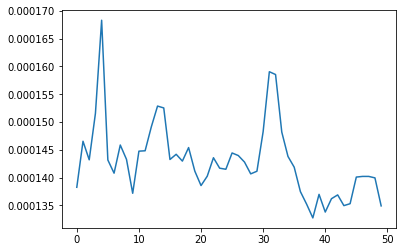

In [9]:
plt.figure()
plt.plot(combAll.epoch_stats.Mean)
plt.show()

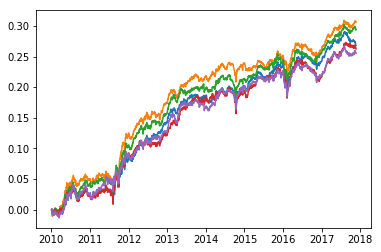

In [10]:
plt.figure()
plt.plot(combAll.best_results_rets.cumsum())
plt.show()

In [11]:
combAll.start(150, criteria='sharpe')

 33%|███▎      | 3/9 [00:00<00:00, 28.15it/s]

Reading and aggregating runs...


100%|██████████| 9/9 [00:00<00:00, 21.65it/s]


Finished aggregating runs...


100%|██████████| 150/150 [23:19<00:00,  9.09s/it]


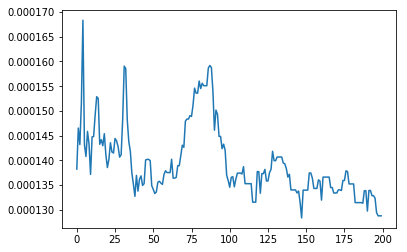

In [12]:
plt.figure()
plt.plot(combAll.epoch_stats.Mean)
plt.show()

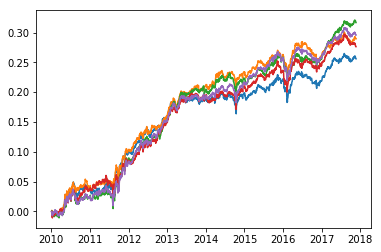

In [13]:
plt.figure()
plt.plot(combAll.best_results_rets.cumsum())
plt.show()

In [17]:
combAll.start(500, criteria='sharpe')

 33%|███▎      | 3/9 [00:00<00:00, 26.49it/s]

Reading and aggregating runs...


100%|██████████| 9/9 [00:00<00:00, 18.45it/s]


Finished aggregating runs...


100%|██████████| 500/500 [1:41:55<00:00, 11.43s/it]


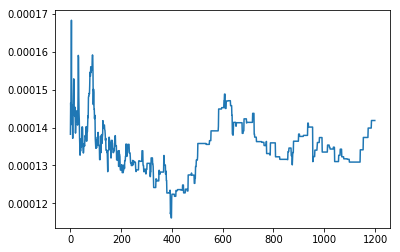

In [18]:
plt.figure()
plt.plot(combAll.epoch_stats.Mean)
plt.show()

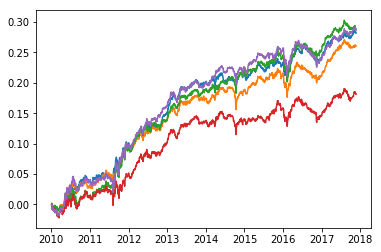

In [19]:
plt.figure()
plt.plot(combAll.best_results_rets.cumsum())
plt.show()